<a href="https://colab.research.google.com/github/ManuelgUAO/Microproyecto_FundamentosIA-2023-03/blob/main/TAREA_2/TAREA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Programando Red Neuronal desde Cero***

**Jose Manuel Gomez Garcia** - 2190257



In [364]:
#Librerias
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

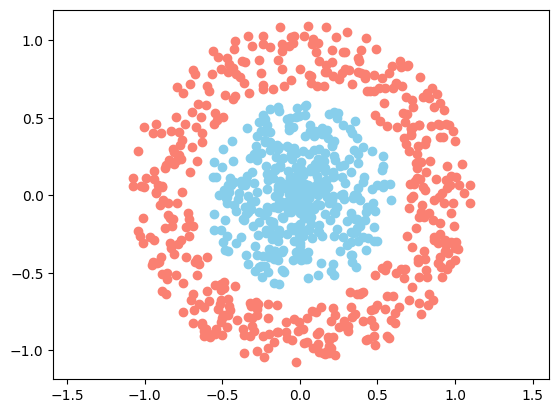

In [365]:
# Número de muestras y factor de ruido
n = 900
noise = 0.1
p=2

# Generar puntos aleatorios en el rango [0, 2*pi] para el ángulo
angle = np.random.rand(n) * 2 * np.pi

# Generar puntos en el círculo interior
r_inner = np.random.rand(n//2) * 0.6
x_inner = r_inner * np.cos(angle[:n//2])
y_inner = r_inner * np.sin(angle[:n//2])

# Generar puntos en el círculo exterior
r_outer = 0.7 + np.random.rand(n//2) * 0.4
x_outer = r_outer * np.cos(angle[n//2:])
y_outer = r_outer * np.sin(angle[n//2:])

# Combinar los puntos de ambas clases
X = np.vstack((np.hstack((x_inner, x_outer)), np.hstack((y_inner, y_outer)))).T

# Etiquetas de clase
Y = np.hstack((np.zeros(n//2), np.ones(n//2)))[:, np.newaxis]

# Visualizar los datos
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [366]:
#Estructuración de la Red Neuronal - Clase de la capa de la red

class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f

    self.b = np.random.rand(1, n_neur)     *2 - 1   #Para que valla de -1 a 1
    self.w = np.random.rand(n_conn, n_neur)*2 - 1   #Para que valla de -1 a 1


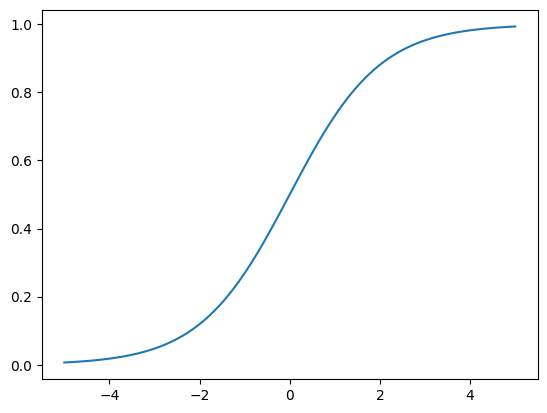

In [367]:
#Funciones de Activación

sigm = (lambda x: 1 / (1 + np.e**(-x)),   #Funcion sigm
        lambda x: x*(1-x))                #Derivada de la Funcion sigm

relu = lambda x: np.maximum(0,x)          #Funcion relu

_x = np.linspace (-5, 5, 100)

#Funcion sigm
plt.plot(_x, sigm[0](_x))

#Derivada de la funcion sigm
#plt.plot(_x, sigm[1](_x))

#Funcion relu
#plt.plot(_x, relu(_x))

In [368]:
#Creacion de capas "lx"

l0=neural_layer(p, 8, sigm)
l1=neural_layer(8, 8, sigm)
#..

def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn

topology = [p, 8, 8, 1]
create_nn (topology, sigm)

In [369]:
topology  = [p, 8, 8, 1]
neural_net= create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) **2), #Error cuadratico medio
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)] #(z0, a0), (z1, a1)

  #Forward pass (Procesamiento hacia adelante de toda nuestra red neuronal)

  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  #print(out[-1][1])
  #print(l2_cost[0](out[-1][1],Y))

  if train:

    #Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      #print(a.shape)

      #Calcular delta ultima capa.
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      #Calcular delta respecto a la capa media
      else:
        deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))

      _w = neural_net[l].w

      #Gradient descent

      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)

array([[0.73905277],
       [0.74546965],
       [0.72953569],
       [0.73993376],
       [0.7464451 ],
       [0.73036182],
       [0.74017093],
       [0.73756165],
       [0.73911062],
       [0.74440241],
       [0.73867398],
       [0.73985103],
       [0.73932369],
       [0.7396716 ],
       [0.73730648],
       [0.74333417],
       [0.74697925],
       [0.73456458],
       [0.73572064],
       [0.73812354],
       [0.74629567],
       [0.7320448 ],
       [0.74465355],
       [0.74436376],
       [0.74724851],
       [0.74224449],
       [0.73168783],
       [0.73905712],
       [0.74054584],
       [0.73597842],
       [0.7478569 ],
       [0.73888529],
       [0.73171461],
       [0.73898118],
       [0.74117092],
       [0.74534117],
       [0.73988941],
       [0.74114764],
       [0.73493043],
       [0.74881759],
       [0.74805486],
       [0.74110695],
       [0.73322082],
       [0.74048653],
       [0.73971419],
       [0.7453107 ],
       [0.73864197],
       [0.731

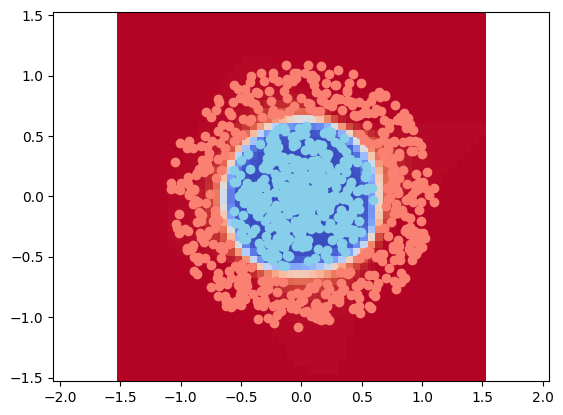

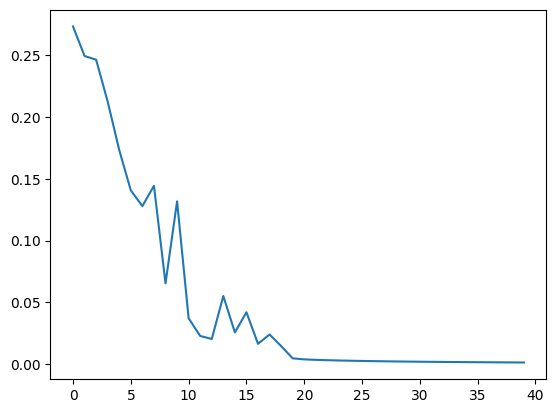

In [370]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(1000):

  #Entrenando a la red
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0:

    print(pY)

    loss.append(l2_cost[0](pY, Y))
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    #Graficando la salida y la perdida
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)